# BÀI THỰC HÀNH 2: MẠNG NEURAL TÍCH CHẬP

<b>Hướng dẫn nộp bài:</b> Các bạn commit và push code lên github, sử dụng file txt đặt tên theo cú pháp <MSSV>.txt chứa đường link dẫn đến github của bài thực hành và nộp file txt này tên courses..

Bộ dữ liệu sử dụng: [VinaFood21 dataset](https://arxiv.org/abs/2108.02929).

Link download: https://drive.google.com/file/d/1UpZOf0XlwvB4rKpyZ35iwTA8oWHqDBbR/view?usp=share_link.

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [2]:
print("--- KIỂM TRA GPU ---")
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Chỉ định TensorFlow chỉ sử dụng GPU đầu tiên nếu có nhiều cái
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        # Bật chế độ tăng trưởng bộ nhớ (memory growth) để tránh chiếm hết VRAM
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print(f"Đã phát hiện và thiết lập {len(gpus)} GPU:")
        print(gpus)
    except RuntimeError as e:
        # Lỗi xảy ra nếu thiết bị đã được khởi tạo
        print(e)
else:
    print("Không tìm thấy GPU. TensorFlow đang chạy trên CPU.")
print("--------------------")

--- KIỂM TRA GPU ---
Không tìm thấy GPU. TensorFlow đang chạy trên CPU.
--------------------


# Bài 2: Xây dựng mô hình GoogLeNet. Huấn luyện và đánh giá mô hình GoogLeNet trên 4 độ đo precision, recall và F1 (sử dụng Adam làm optimizer).

**Inception Blocks**

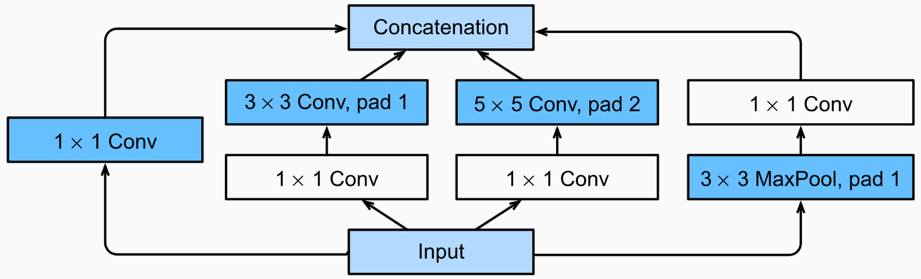

**GoogLeNet (Multi-branch Network)**

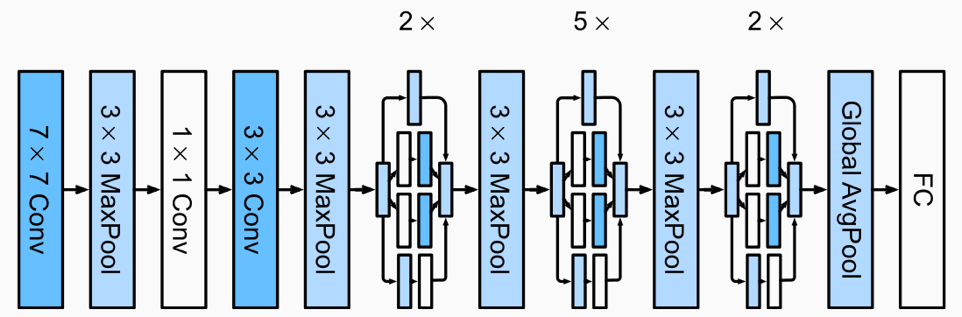

In [3]:
from tensorflow import Tensor
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate

from typing import Tuple

def inception_block(x:Tensor, filters: Tuple[int, int, int, int, int, int]) -> Tensor:
    """
    x: Tensor có từ ảnh,
    filters: Tuple số filters/kernels cho mỗi lớp conv2D
    f1: 1x1 Conv
    f3r, f3: Số filters của nhánh 1x1 Conv, 3x3 Conv 
    f5, f5r: Số filters của nhánh 1x1 Conv, 5x5 Conv
    fp:      Số filters của nhánh pooling -> 1x1 Conv
    """
    f1, f3r, f3, f5r, f5, fp = filters
    
    # Conv 1x1 branch
    branch2 = Conv2D(filters=f1, kernel_size=(1, 1), padding='same', activation='relu')(x)

    # Conv 1x1 -> Conv 3x3 branch
    branch3 = Conv2D(filters=f3r, kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3 = Conv2D(filters=f3, kernel_size=(3, 3), padding='same', activation='relu')(branch3)

    # Conv 1x1 -> Conv 5x5 branch
    branch4 = Conv2D(filters=f5r, kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch4 = Conv2D(filters=f5, kernel_size=(5, 5), padding='same', activation='relu')(branch4)

    # Pooling -> 1x1 Conv branch
    branch5 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch5 = Conv2D(filters=fp, kernel_size=(1, 1), padding='same')(branch5)

    # ouput
    output = concatenate([branch2, branch3, branch4, branch5], axis = -1) # concatenate by deep channel
    
    return output

In [5]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model # Can not use Sequential because of Parallel branch

inp = Input(shape=(28, 28, 1))
x = inception_block(inp, (16, 16, 24, 4, 8, 8))
x = MaxPooling2D(pool_size=(2,2),)(x)
x = inception_block(x, (32, 32, 48, 8, 16, 16))
x = MaxPooling2D(pool_size=(2,2),)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

sample_inception_model = Model(inputs=inp, outputs=out)
sample_inception_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_13 (Conv2D)             (None, 28, 28, 16)   32          ['input_2[0][0]']                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 28, 28, 4)    8           ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 28, 28, 1)   0           ['input_2[0][0]']                
                                                                                              

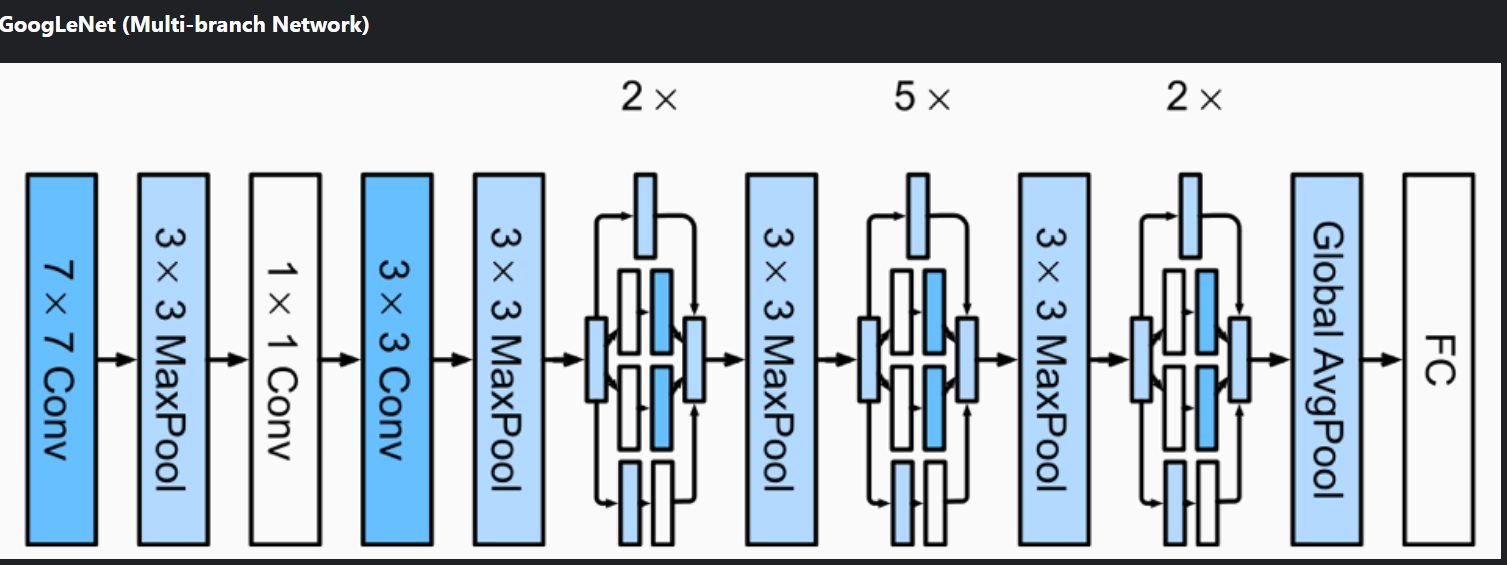

### Bài 3*: Xây dựng mô hình ResNet-18, đánh giá mô hình ResNet-18 trên bộ dữ liệu VinaFood21 sử dụng các độ đo precision, recall, và F1 (Sử dụng Adam làm optimizer).

**ResNet Block**

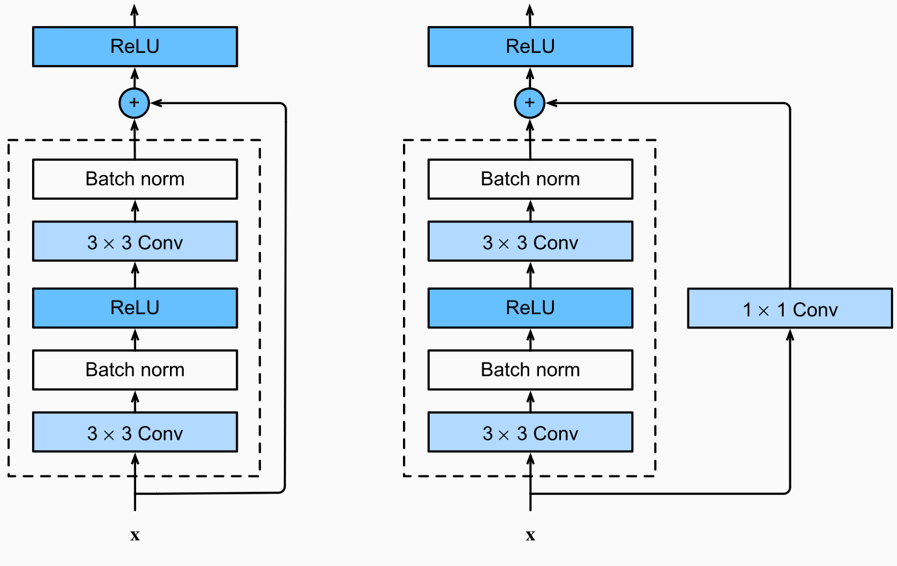

**ResNet**

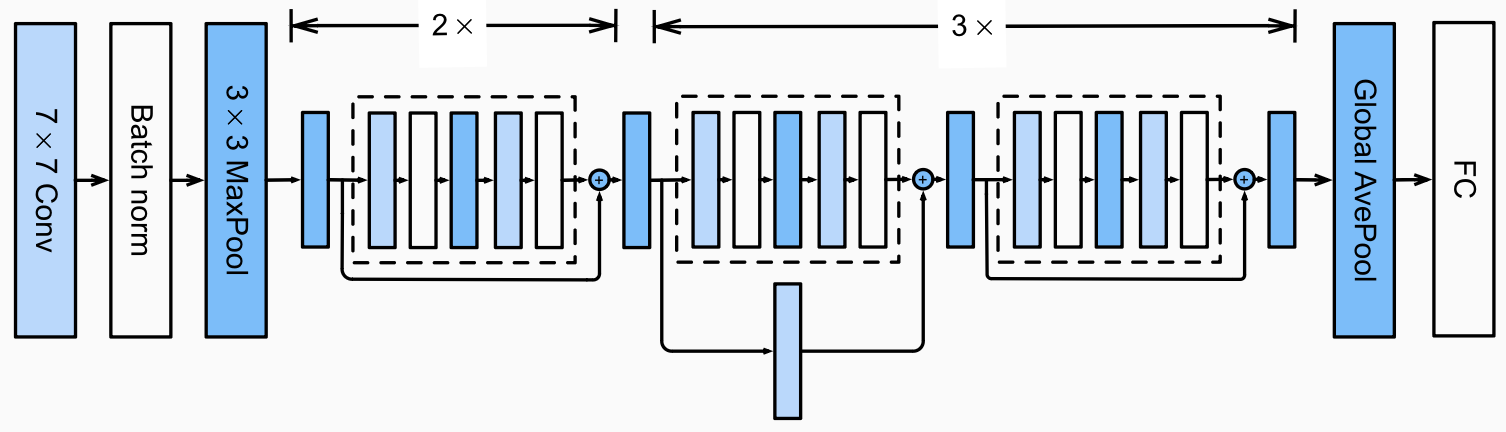

### Bài 4*: Sử dụng pretrained ResNet50 từ HuggingFace để fine-tune trên bộ dữ liệu VinaFood21.